In [29]:
import pandas as pd
data=pd.read_csv("WineQuality.csv")
data.head(5)


Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  White Wine            7.4             0.170         0.29             1.4   
1  White Wine            5.3             0.310         0.38            10.5   
2  White Wine            4.7             0.145         0.29             1.0   
3  White Wine            6.9             0.260         0.29             4.2   
4  White Wine            6.4             0.450         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                 23.0                 107.0  0.99390  3.52   
1      0.031                 53.0                 140.0  0.99321  3.34   
2      0.042                 35.0                  90.0  0.99080  3.76   
3      0.043                 33.0                 114.0  0.99020  3.16   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality  
0       0.65     10.4        6  
1       0.46     11.7        6  
2       0.49     11.3        6  
3       0.31     12.5        6  
4       0.28     10.8        5

In [30]:
data=data.dropna()

In [31]:
data["Type"][data["Type"] == "white"] = 1
data["Type"][data["Type"] == "White Wine"] = 1
data["Type"][data["Type"] == "red"] = 0
data["Type"][data["Type"] == "Red Wine"] = 0


data





C:\Users\hp\AppData\Local\Temp\ipykernel_1268\2795219862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "White Wine"] = 1
C:\Users\hp\AppData\Local\Temp\ipykernel_1268\2795219862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "red"] = 0
C:\Users\hp\AppData\Local\Temp\ipykernel_1268\2795219862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"]

Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.4             0.170         0.29             1.4   
1        1            5.3             0.310         0.38            10.5   
2        1            4.7             0.145         0.29             1.0   
3        1            6.9             0.260         0.29             4.2   
4        1            6.4             0.450         0.07             1.1   
...    ...            ...               ...          ...             ...   
38976    0            6.8             0.620         0.08             1.9   
38977    0            6.2             0.600         0.08             2.0   
38979    0            6.3             0.510         0.13             2.3   
38980    0            5.9             0.645         0.12             2.0   
38981    0            6.0             0.310         0.47             3.6   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0          0.047                 23.0                 107.0  0.99390  3.52   
1          0.031                 53.0                 140.0  0.99321  3.34   
2          0.042                 35.0                  90.0  0.99080  3.76   
3          0.043                 33.0                 114.0  0.99020  3.16   
4          0.030                 10.0                 131.0  0.99050  2.97   
...          ...                  ...                   ...      ...   ...   
38976      0.068                 28.0                  38.0  0.99651  3.42   
38977      0.090                 32.0                  44.0  0.99490  3.45   
38979      0.076                 29.0                  40.0  0.99574  3.42   
38980      0.075                 32.0                  44.0  0.99547  3.57   
38981      0.067                 18.0                  42.0  0.99549  3.39   

       sulphates  alcohol  quality  
0           0.65     10.4        6  
1           0.46     11.7        6  
2           0.49     11.3        6  
3           0.31     12.5        6  
4           0.28     10.8        5  
...          ...      ...      ...  
38976       0.82      9.5        6  
38977       0.58     10.5        5  
38979       0.75     11.0        6  
38980       0.71     10.2        5  
38981       0.66     11.0        6  

[38948 rows x 13 columns]

<AxesSubplot: xlabel='quality', ylabel='fixed acidity'>

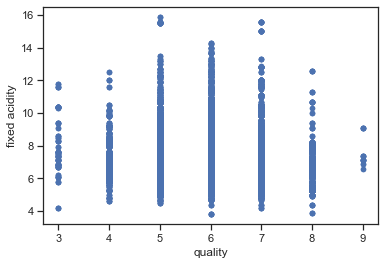

In [32]:
import matplotlib.pyplot as plt
data[["quality","fixed acidity"]].plot(kind="scatter",x="quality",y="fixed acidity")

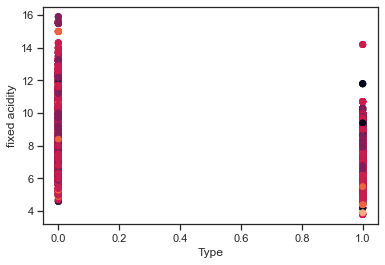

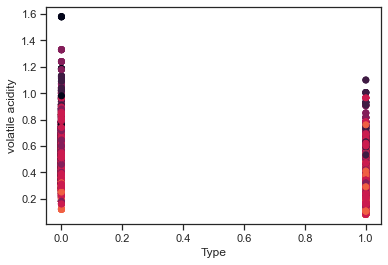

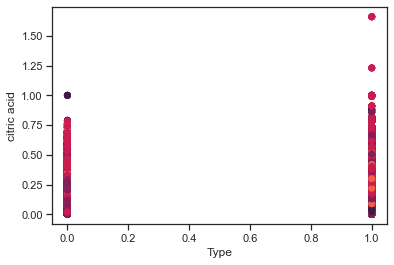

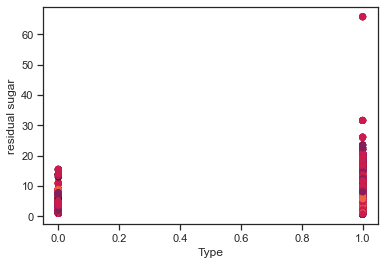

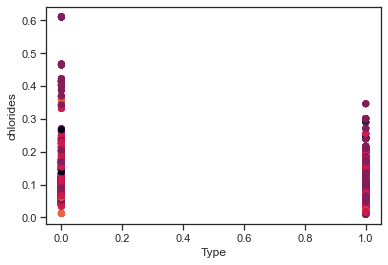

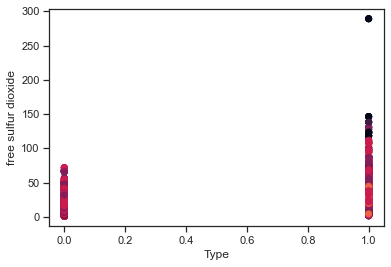

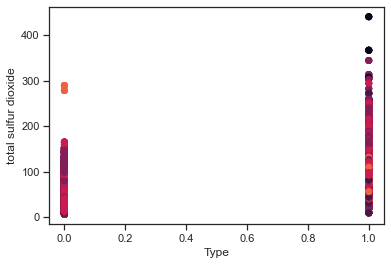

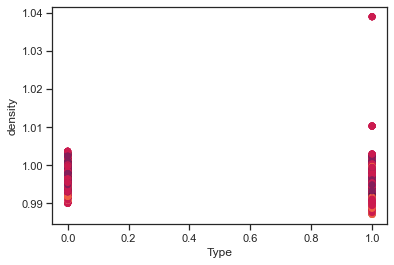

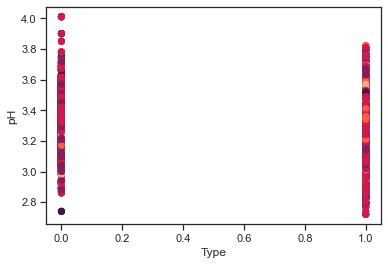

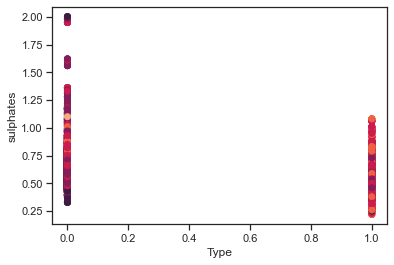

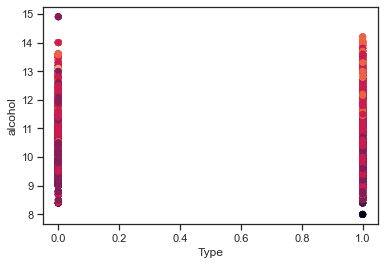

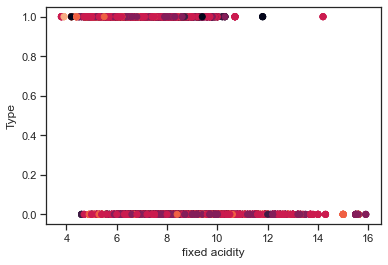

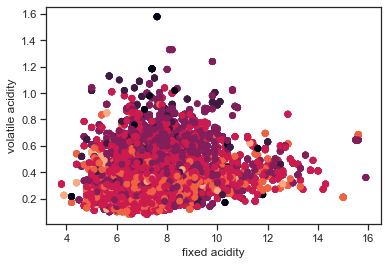

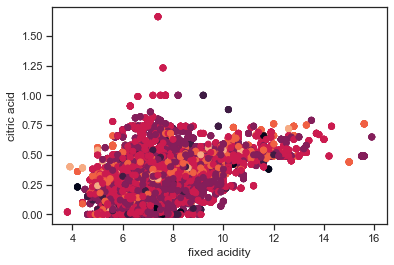

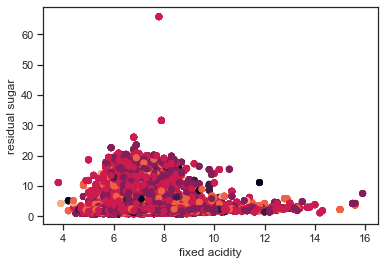

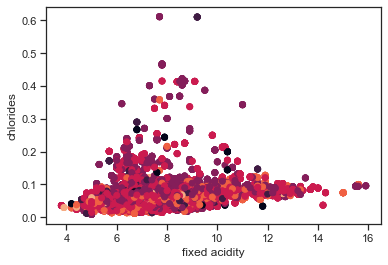

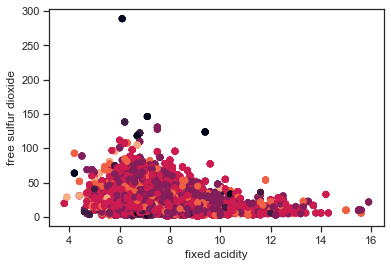

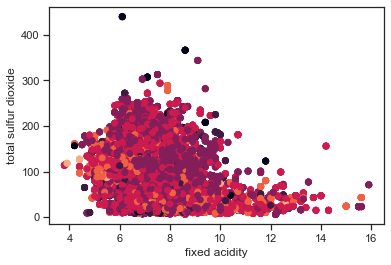

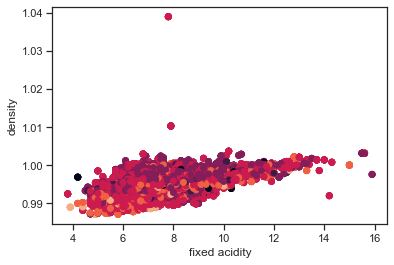

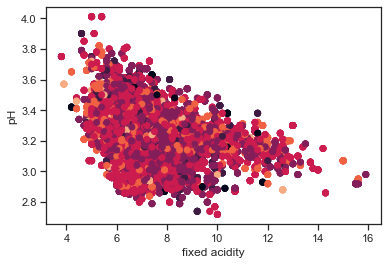

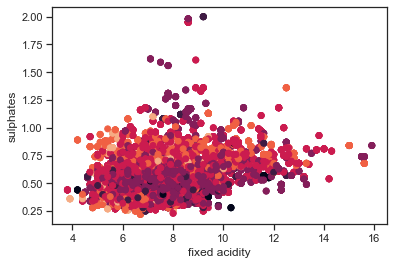

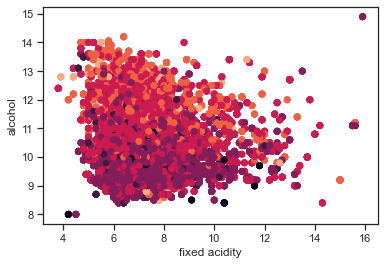

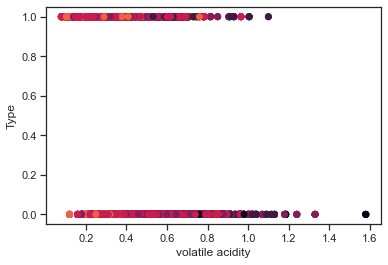

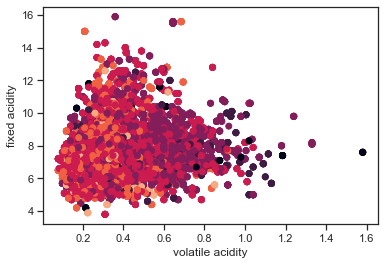

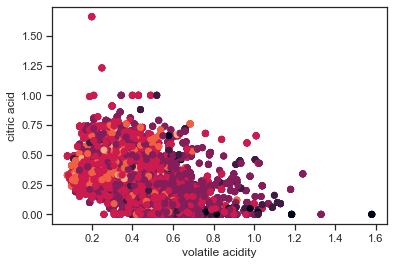

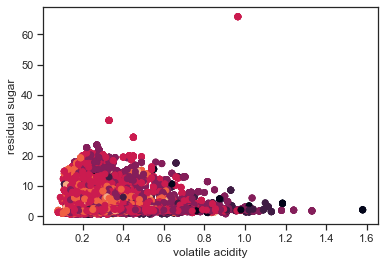

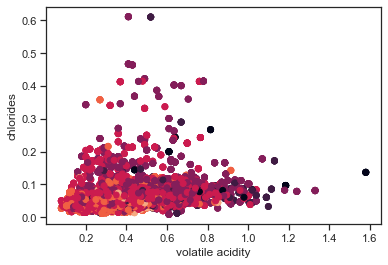

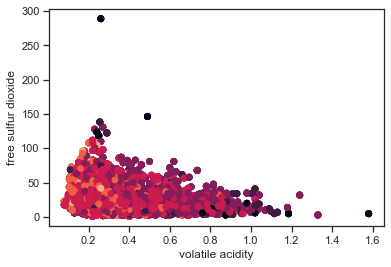

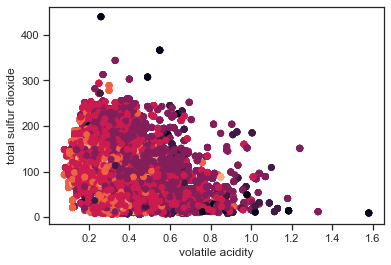

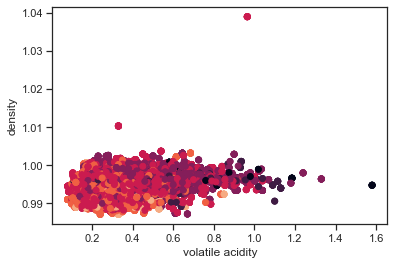

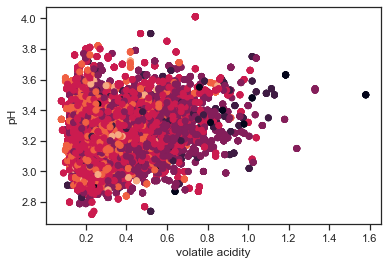

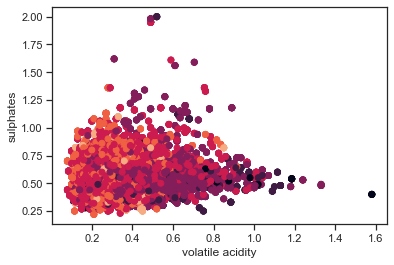

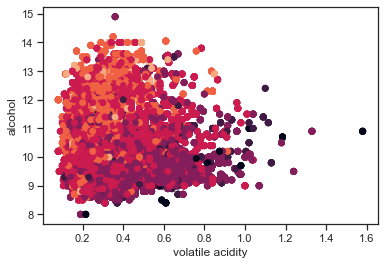

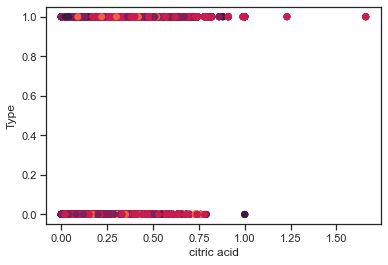

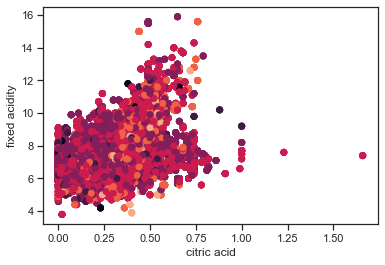

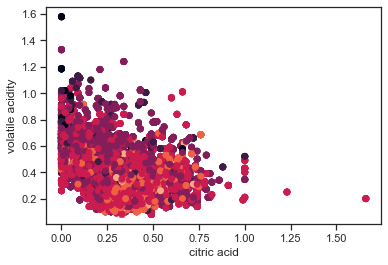

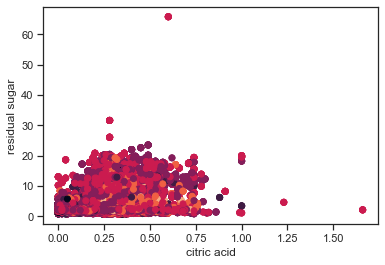

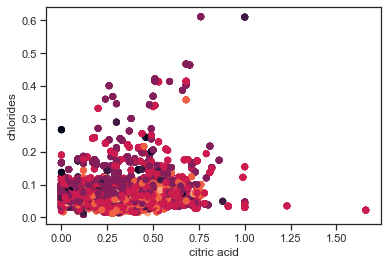

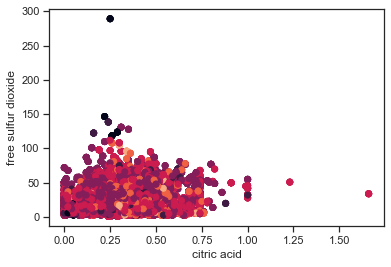

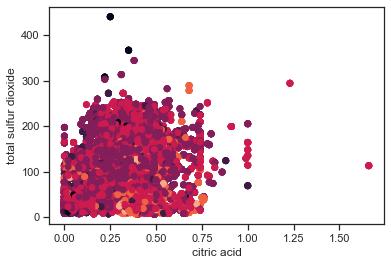

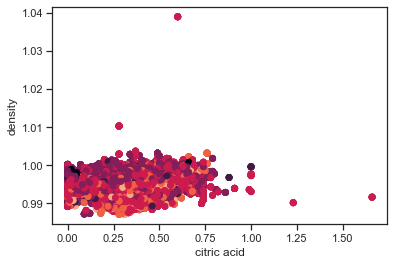

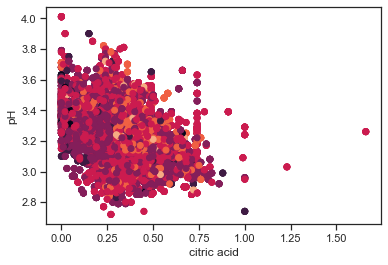

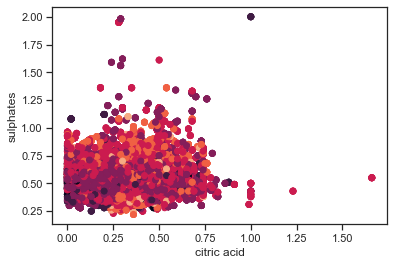

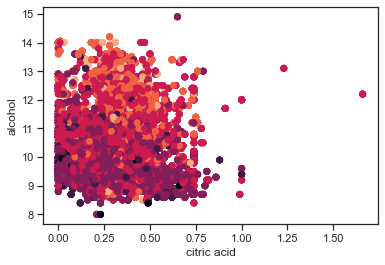

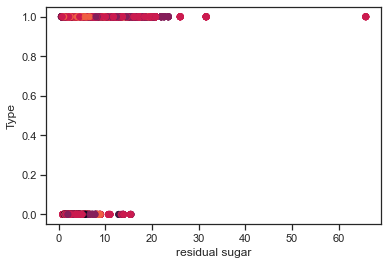

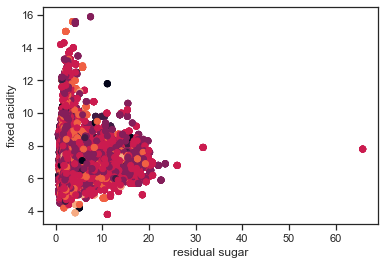

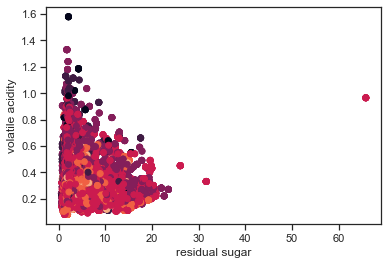

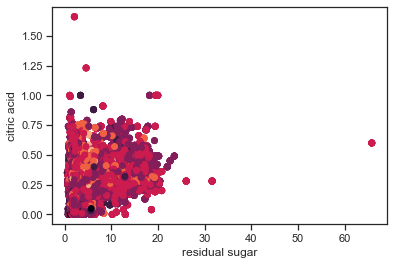

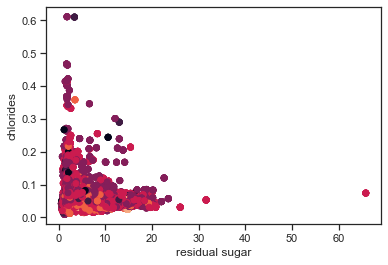

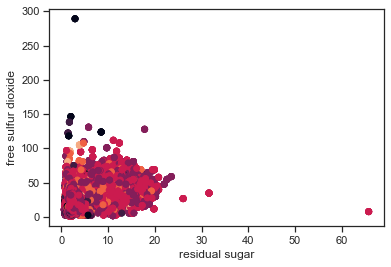

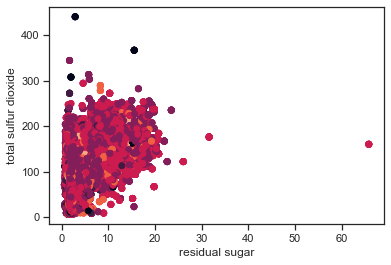

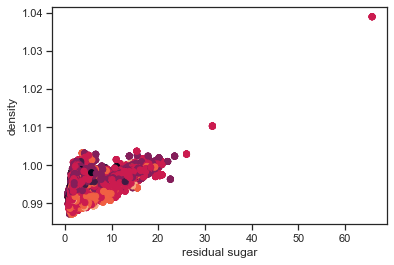

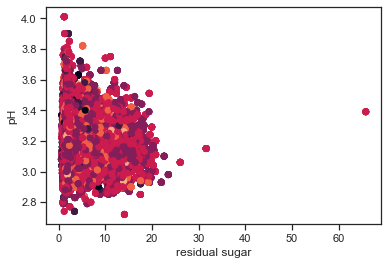

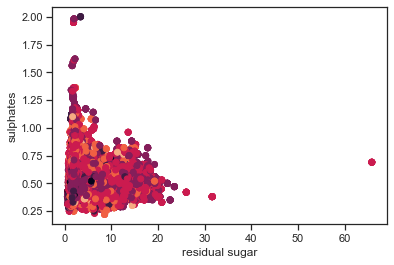

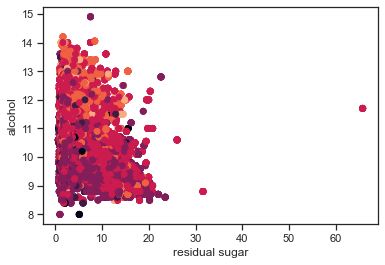

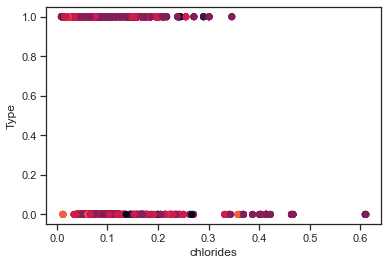

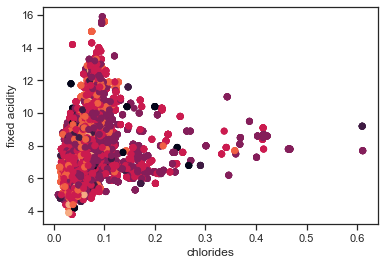

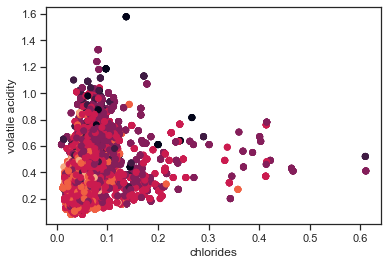

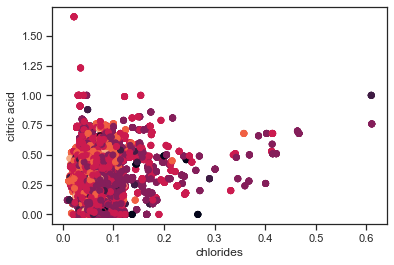

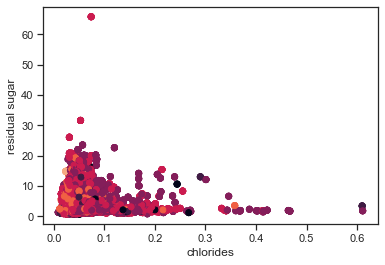

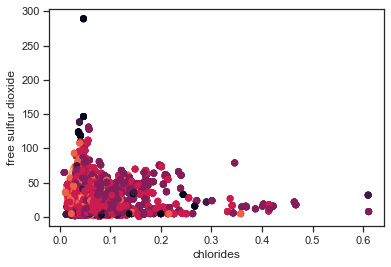

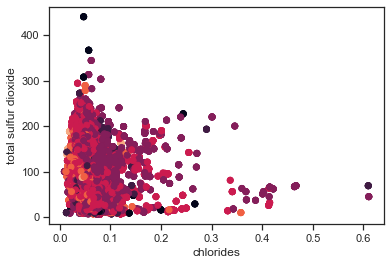

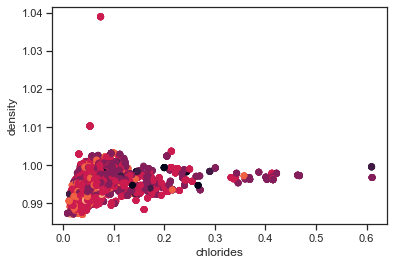

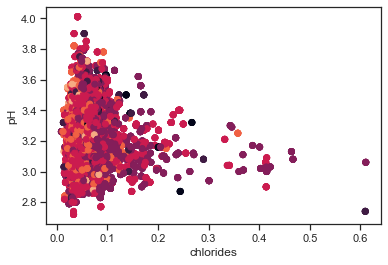

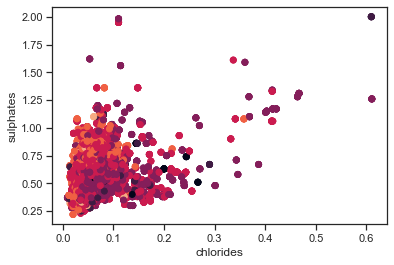

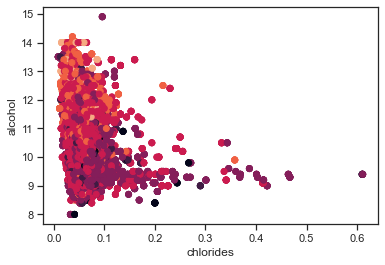

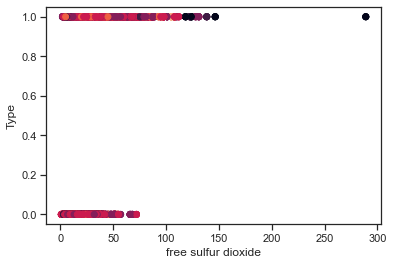

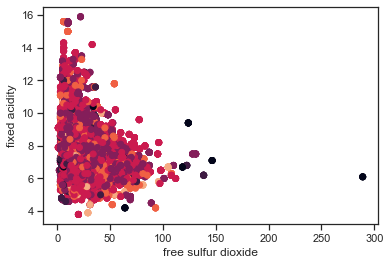

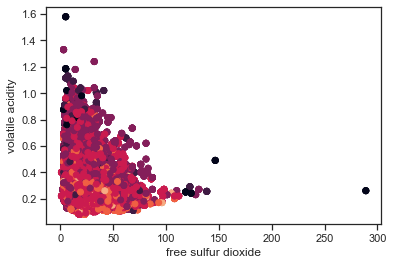

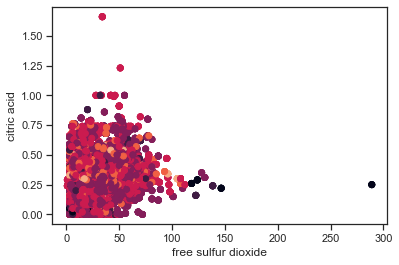

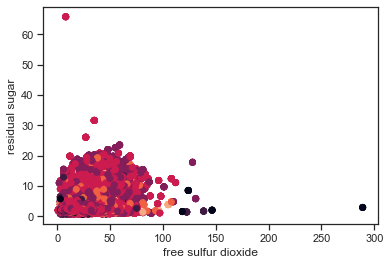

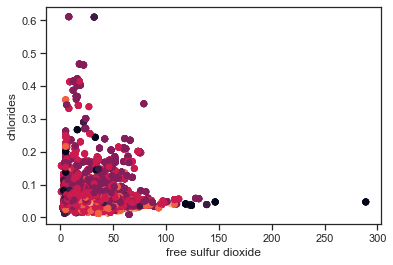

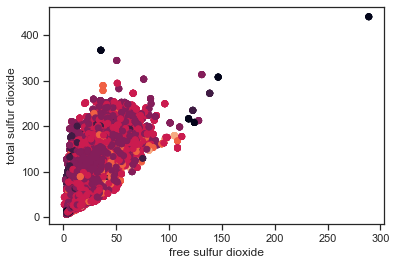

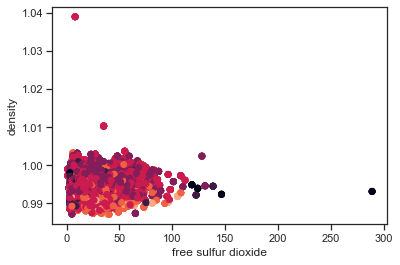

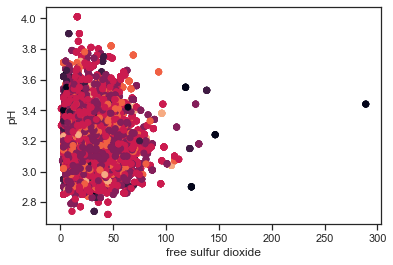

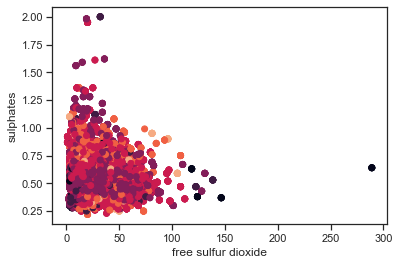

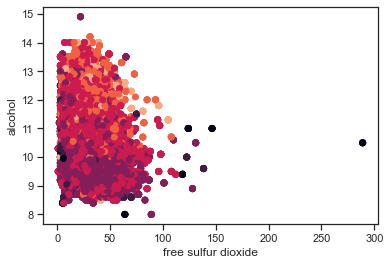

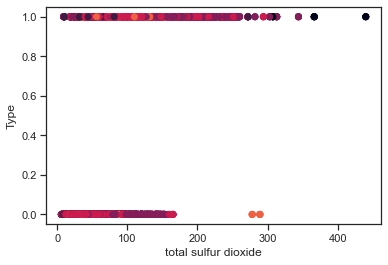

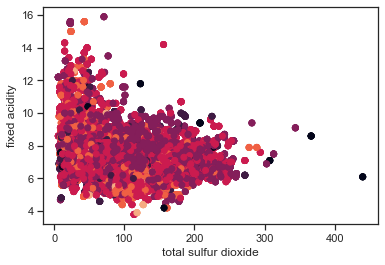

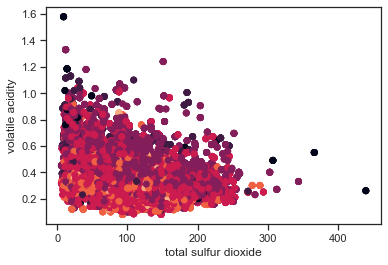

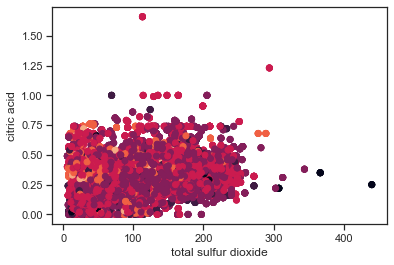

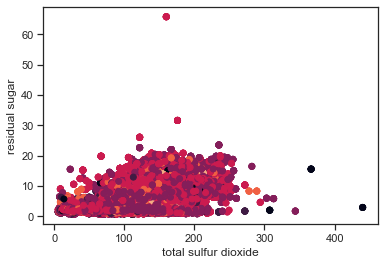

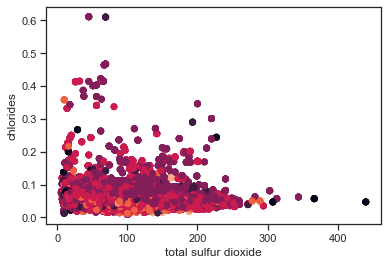

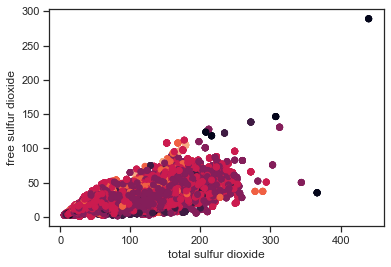

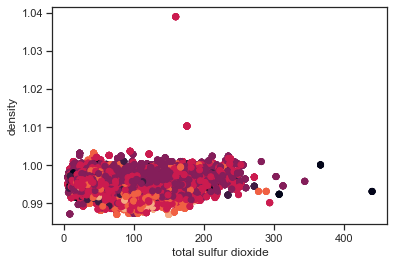

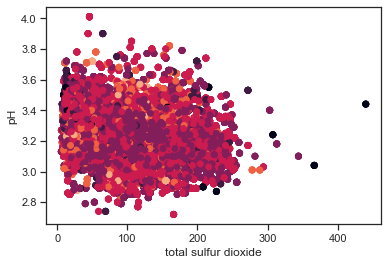

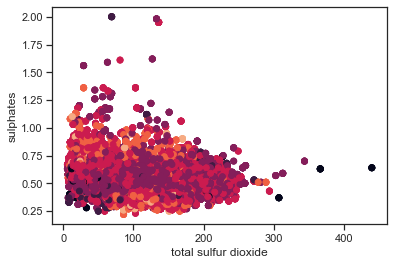

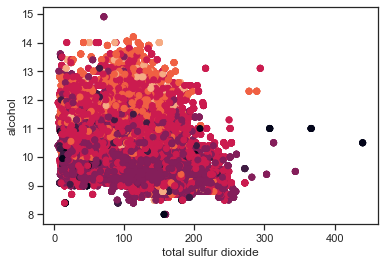

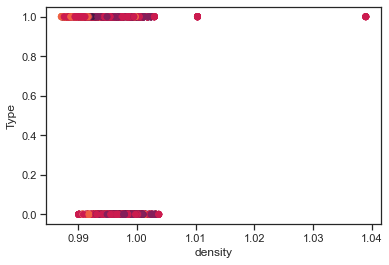

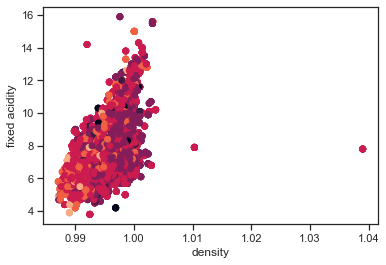

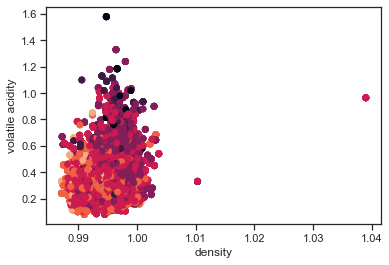

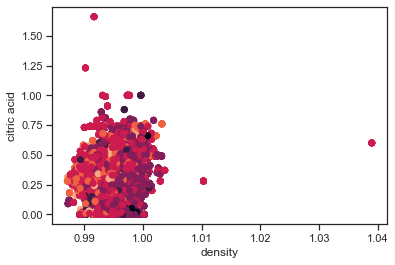

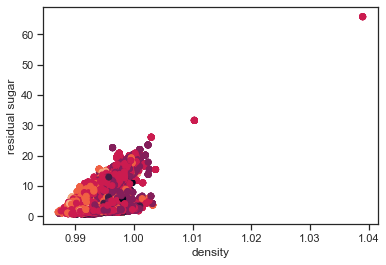

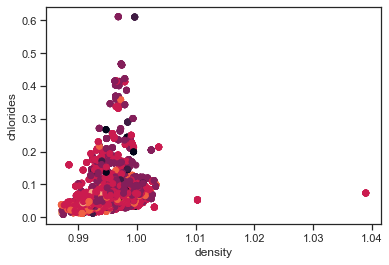

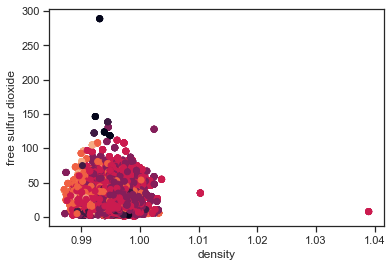

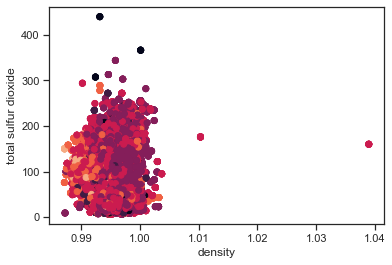

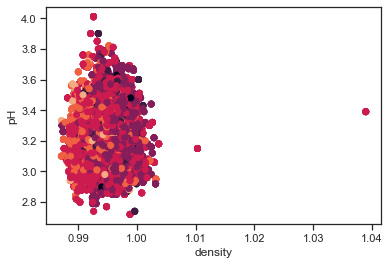

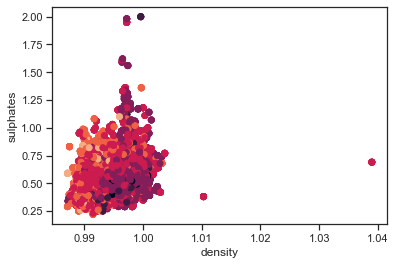

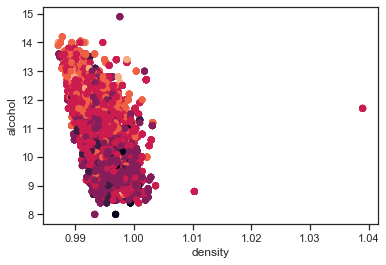

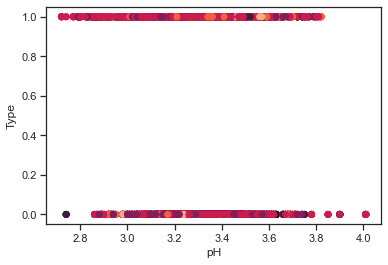

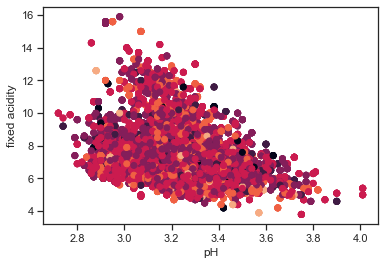

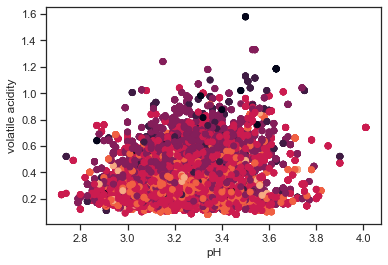

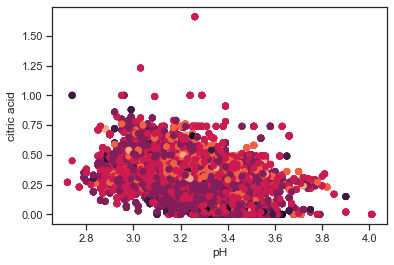

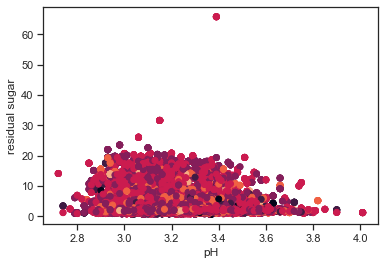

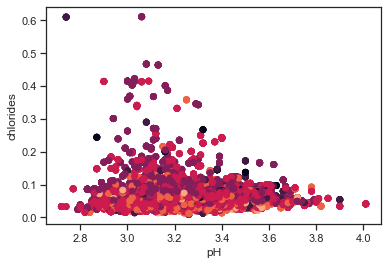

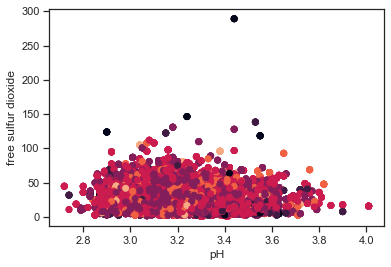

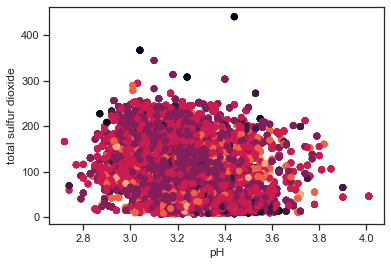

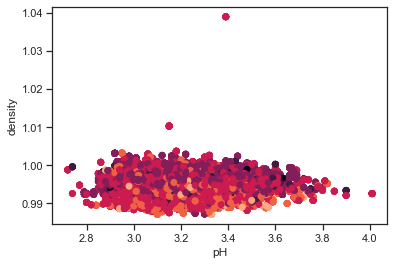

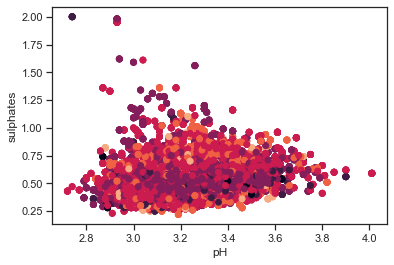

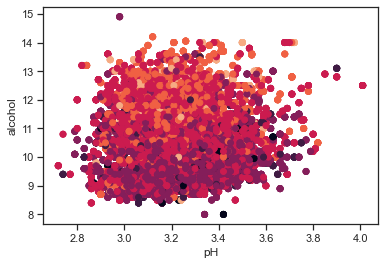

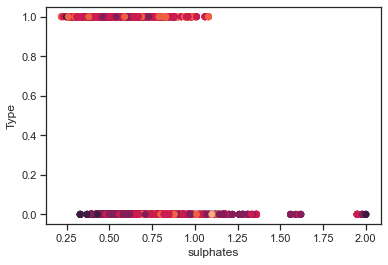

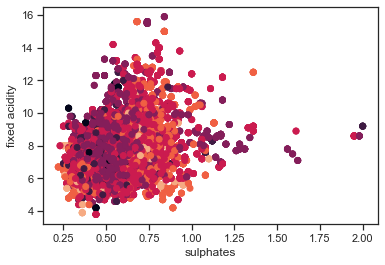

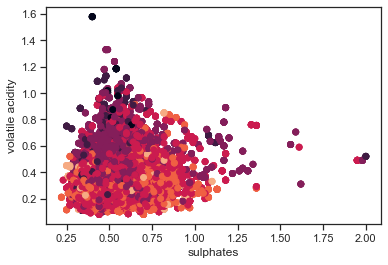

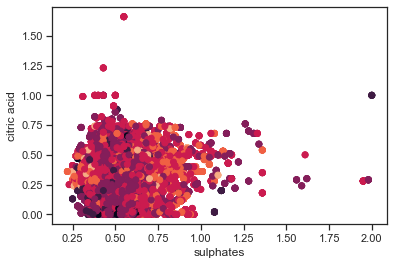

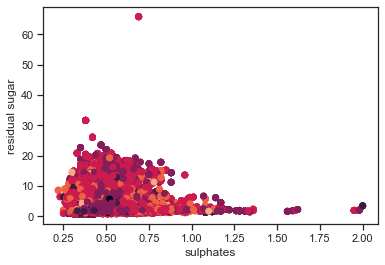

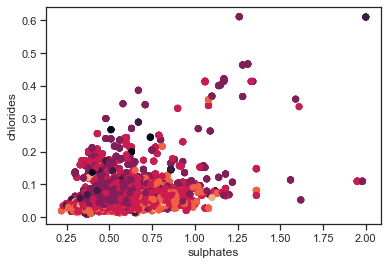

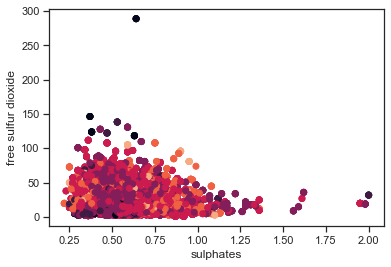

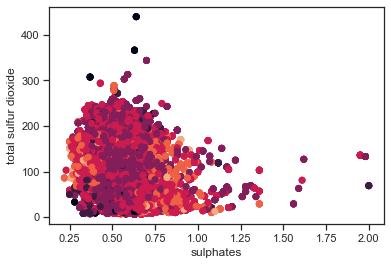

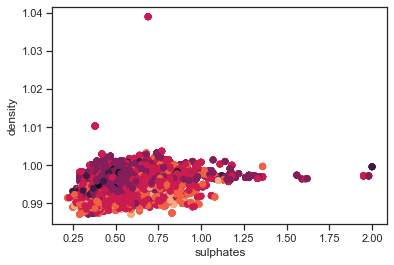

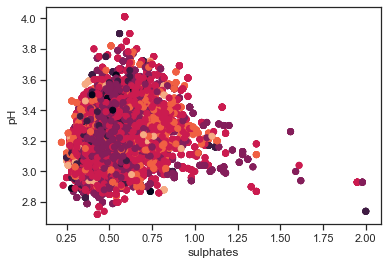

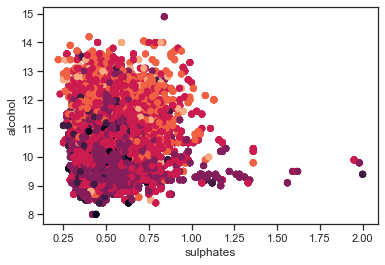

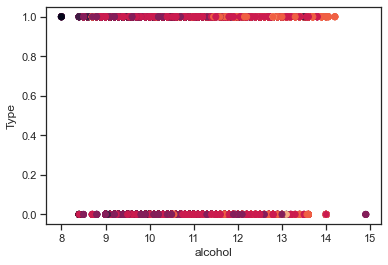

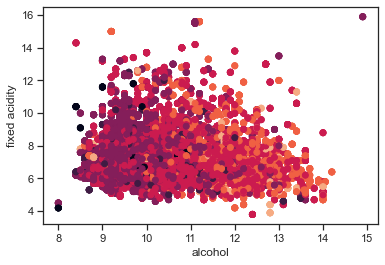

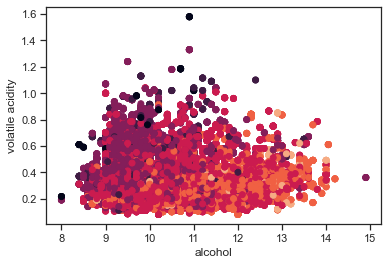

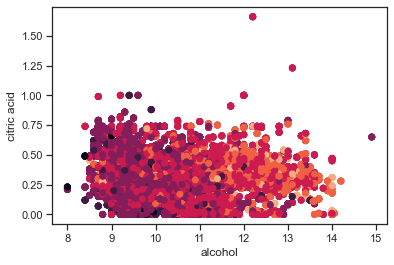

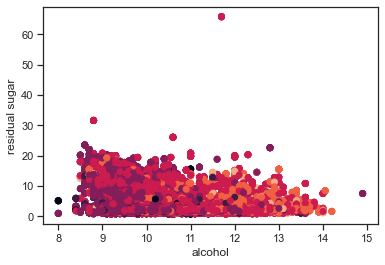

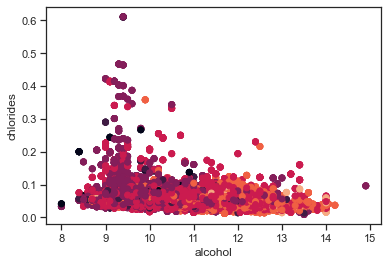

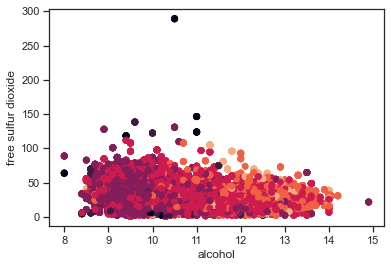

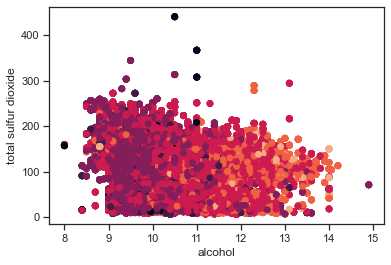

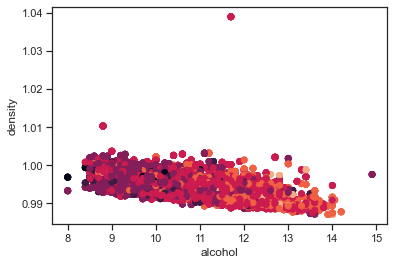

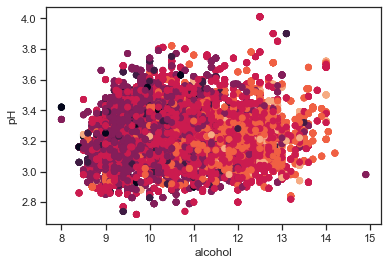

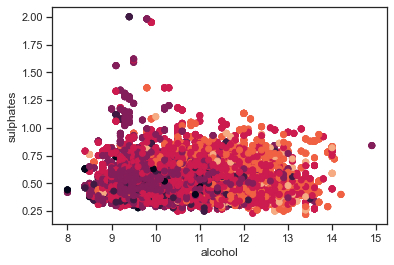

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

# Separate the target variable (if applicable)
X = data.drop(columns=['quality'])  # Remove the target column if you have one

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Separate the target variable (if applicable)
X = data.drop(columns=['quality'])  # Remove the target column if you have one

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a PCA instance with the desired number of components
n_components = 2  # Adjust this as needed
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data and transform it
X_pca = pca.fit_transform(X_scaled)
X_pca

list1=["Type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in list1:
    for j in list1:
        if i==j:
            continue
        else:
            
            plt.scatter(x=data[i],y=data[j],c=data["quality"])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()




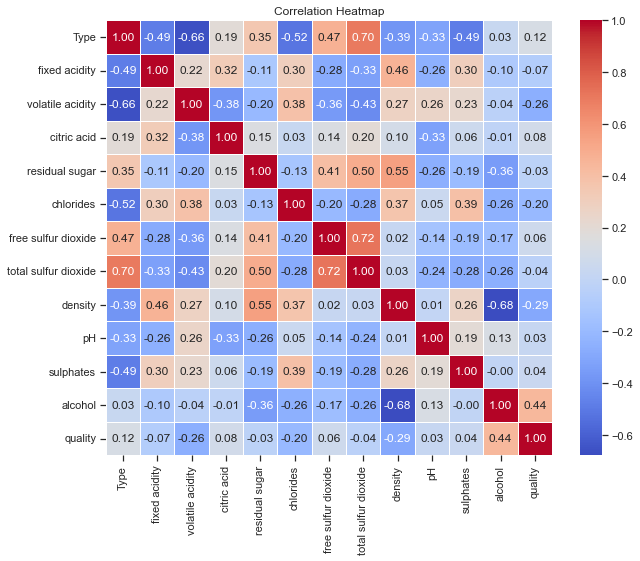

In [34]:
correlation_matrix = data.corr()
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set plot title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

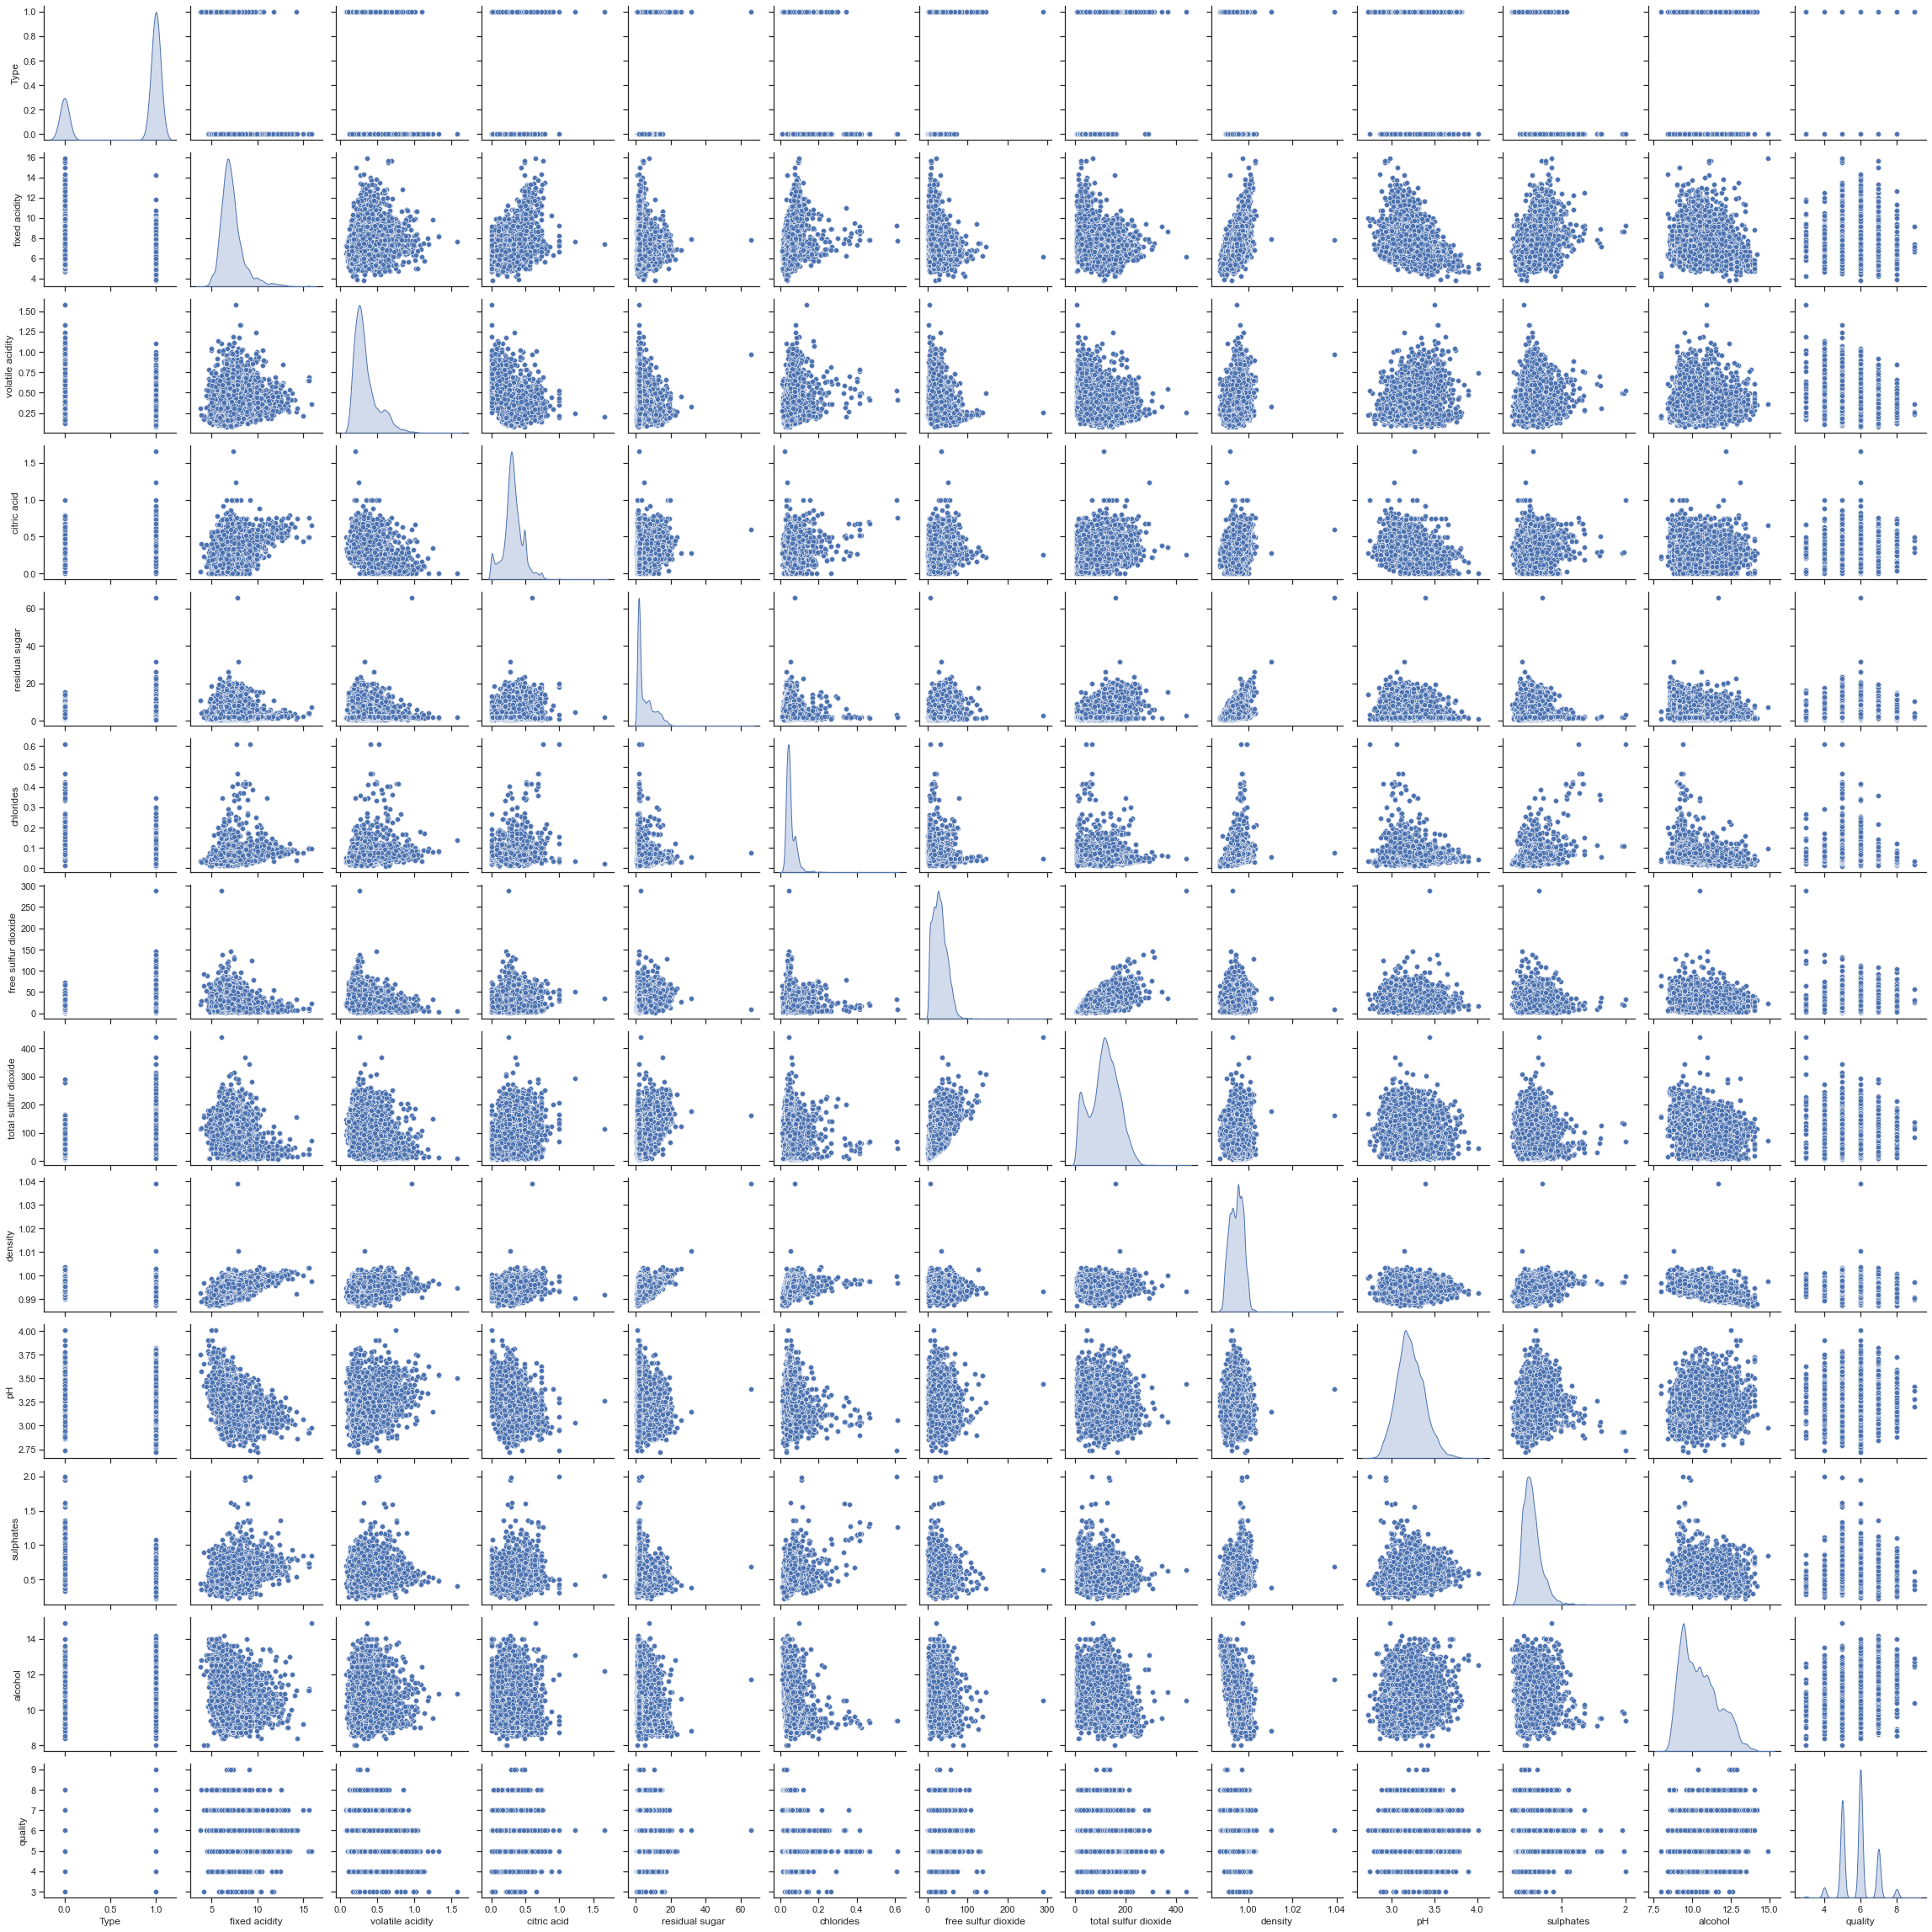

In [35]:
# Set style (optional)
sns.set(style="ticks")

# Create a pairwise scatter plot
sns.pairplot(data, diag_kind="kde")

# Display the plot
plt.show()


In [36]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your wine quality dataset (replace 'wine_dataset.csv' with your dataset file)


# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create logistic regression model for multiclass classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_train=model.predict(X_train)
y_pred_test = model.predict(X_test)


# Calculate accuracy
train_accuracy=accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_test)
print("train Accuracy:", train_accuracy)
print("test Accuracy:",val_accuracy)



train Accuracy: 0.5469221387765582
test Accuracy: 0.5558408215661104


Training MSE: 0.6407022273573401
Testing MSE: 0.6220795892169448
Training RMSE: 0.8004387717729196
Testing RMSE: 0.7887202223963481
Training R2 Score: 0.1613954372047839
Testing R2 Score: 0.17168662108650934
Training MAE: 0.5163039989729764
Testing MAE: 0.5026957637997432
Training Accuracy: 0.5413697926696194
Testing Accuracy: 0.5518613607188704
Classification Report (Testing Data):
               precision    recall  f1-score   support

           3       1.00      0.00      0.00        31
           4       0.73      0.03      0.06       253
           5       0.61      0.61      0.61      2603
           6       0.53      0.73      0.61      3368
           7       0.48      0.18      0.26      1314
           8       1.00      0.00      0.00       216
           9       1.00      0.00      0.00         5

    accuracy                           0.55      7790
   macro avg       0.76      0.22      0.22      7790
weighted avg       0.57      0.55      0.51      7790



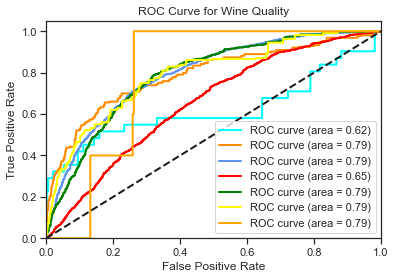

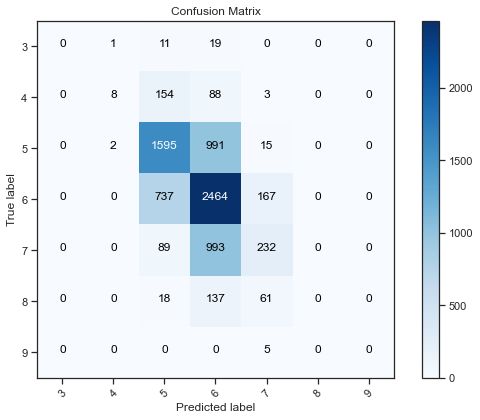

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report,roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Load the Wine Quality dataset (you can download it from the UCI Machine Learning Repository)
 # Replace 'winequality.csv' with your dataset file

# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model for multiclass classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, C=0.1  )
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_test = classification_report(y_test, y_test_pred,zero_division=1)

# Print the evaluation metrics
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)

print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)

print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

print("Classification Report (Testing Data):\n", classification_report_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','yellow','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Quality')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Load the Wine Quality dataset (you can download it from the UCI Machine Learning Repository)
 # Replace 'winequality.csv' with your dataset file

# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results for different numbers of components
results = []

# Vary the number of components: 4, 6, 8, 10
for n_components in [4, 6, 8, 10]:
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Create and fit a logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000,C=0.1)
    model.fit(X_train_pca, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    n = X_train_pca.shape[0]
    p = X_train_pca.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Store the results in a dictionary
    result = {
        'n_components': n_components,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Adj_R2_train': adj_r2_train,
        'Adj_R2_test': adj_r2_test,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
    }
    
    results.append(result)

# Display the results
for result in results:
    print(f"Number of Components: {result['n_components']}")
    print(f"Train MSE: {result['MSE_train']:.4f}, Test MSE: {result['MSE_test']:.4f}")
    print(f"Train RMSE: {result['RMSE_train']:.4f}, Test RMSE: {result['RMSE_test']:.4f}")
    print(f"Train R2 Score: {result['R2_train']:.4f}, Test R2 Score: {result['R2_test']:.4f}")
    print(f"Train Adjusted R2 Score: {result['Adj_R2_train']:.4f}, Test Adjusted R2 Score: {result['Adj_R2_test']:.4f}")
    print(f"Train MAE: {result['MAE_train']:.4f}, Test MAE: {result['MAE_test']:.4f}")
    print()


Number of Components: 4
Train MSE: 0.8224, Test MSE: 0.7969
Train RMSE: 0.9068, Test RMSE: 0.8927
Train R2 Score: -0.0764, Test R2 Score: -0.0611
Train Adjusted R2 Score: -0.0765, Test Adjusted R2 Score: -0.0613
Train MAE: 0.6368, Test MAE: 0.6259

Number of Components: 6
Train MSE: 0.7119, Test MSE: 0.6913
Train RMSE: 0.8438, Test RMSE: 0.8314
Train R2 Score: 0.0682, Test R2 Score: 0.0796
Train Adjusted R2 Score: 0.0680, Test Adjusted R2 Score: 0.0794
Train MAE: 0.5527, Test MAE: 0.5370

Number of Components: 8
Train MSE: 0.6723, Test MSE: 0.6565
Train RMSE: 0.8200, Test RMSE: 0.8102
Train R2 Score: 0.1200, Test R2 Score: 0.1259
Train Adjusted R2 Score: 0.1197, Test Adjusted R2 Score: 0.1257
Train MAE: 0.5360, Test MAE: 0.5258

Number of Components: 10
Train MSE: 0.6423, Test MSE: 0.6218
Train RMSE: 0.8014, Test RMSE: 0.7886
Train R2 Score: 0.1593, Test R2 Score: 0.1720
Train Adjusted R2 Score: 0.1591, Test Adjusted R2 Score: 0.1718
Train MAE: 0.5170, Test MAE: 0.5022

